# mtcars

In this notebook, you'll explore the iconic `mtcars` dataset. Why mtcars? Because it is a classic pedagogical dataset and there is A LOT written about it online. Every complicated concept we encounter, you should be able to google the name plus `mtcars` and find some information about it. So for example, when we study linear regression, you'll be able to google "linear regression mtcars" and find a million billion tutorials that use this dataset to teach regressions. It will give us a common vocabulary with other learners around the world. 

### Standard Python and R imports

In [3]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [4]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [5]:
%%R

# My commonly used R imports

require('tidyverse')

R[write to console]: Loading required package: tidyverse



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [6]:
# EXAMPLE PYTHON CELL

df = pd.DataFrame(
    np.random.randint(0,100,size=(100, 2)), columns=list('AB'))
df.head()

,A,B
0,88,22
1,60,19
2,4,17
3,26,28
4,71,13


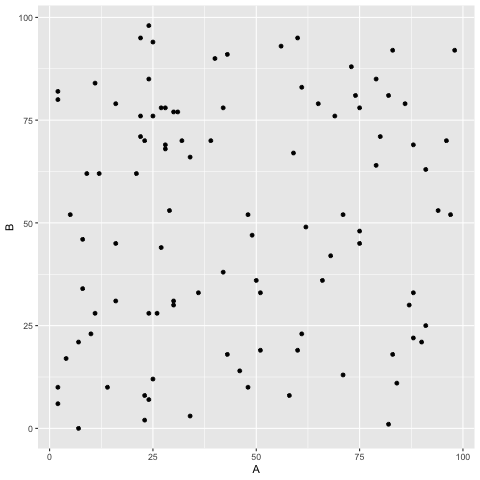

In [7]:
%%R -i df

# EXAMPLE R CELL
df
plt <- ggplot(df) +
    geom_point(aes(A,B))

plt

## Load the data

In [8]:
%%R
 
# Import data with R
mtcars <- read_csv('mtcars.csv', show_col_types = FALSE)
mtcars %>% head(4)

# A tibble: 4 × 12
  name           mpg   cyl  disp    hp  drat    wt  qsec    vs    am  gear  carb
  <chr>        <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>
1 Mazda RX4     21       6   160   110  3.9   2.62  16.5     0     1     4     4
2 Mazda RX4 W…  21       6   160   110  3.9   2.88  17.0     0     1     4     4
3 Datsun 710    22.8     4   108    93  3.85  2.32  18.6     1     1     4     1
4 Hornet 4 Dr…  21.4     6   258   110  3.08  3.22  19.4     1     0     3     1


In [9]:
# Import data in python
mtcars = pd.read_csv('mtcars.csv')
mtcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


# Exploratory data analysis

So far we've done a lot of looking at distributions of single variables. In this dataset we have some continuous variables (like `mpg`, `disp`, `hp`, `drat`, `wt`, and `qsec`) and some discrete variables (like `vs`, `am`, `gear`, and `carb`). Let's quickly glance through the distributions of them.




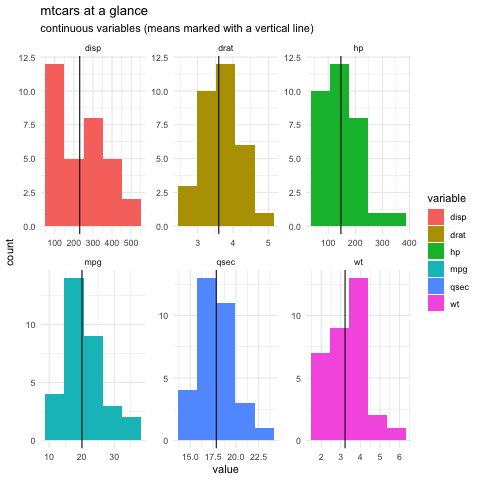

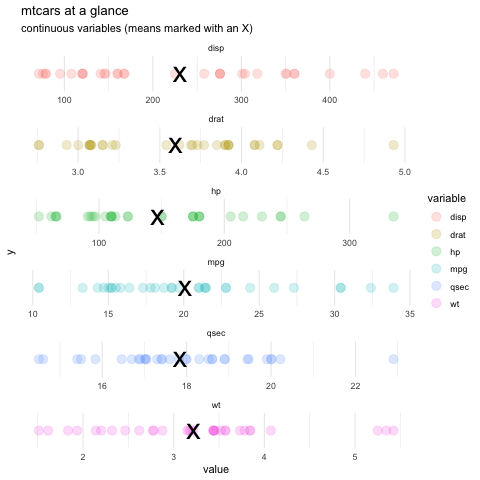

In [10]:
%%R -i mtcars

continuous_variables <- c('mpg', 'disp', 'hp', 'drat', 'wt', 'qsec')
discrete_variables   <- c('vs', 'am', 'gear', 'carb')

# Conevert to long format
mtcars_long = mtcars %>% pivot_longer(!name, names_to = 'variable', values_to = 'value') 

# plot only continuous variables
to_plot <- mtcars_long %>% filter(variable %in% continuous_variables)

histogram_means <- to_plot %>%
  group_by(variable) %>%
  summarise(mean = mean(value))

plot_continuous_histograms <- ggplot(to_plot) +
    aes(x=value, fill=variable, group=variable) +
    geom_histogram(bins=5) +
    geom_vline(data=histogram_means, aes(xintercept=mean)) +
    facet_wrap(~variable, scales='free') +
    theme_minimal() +
    labs(title = 'mtcars at a glance', subtitle='continuous variables (means marked with a vertical line)')


plot_continuous_dotplot <- ggplot(to_plot) +
    aes(x=value, y=1, color=variable) +
    geom_point(size=4, alpha=.2) +
    stat_summary(fun.y= mean, geom="point", shape='x',
                 size=10, color="black", alpha=1, orientation='y') +
    facet_wrap(~variable, scales='free', ncol=1) +
    theme_minimal() +
    labs(
        title = 'mtcars at a glance', 
        subtitle='continuous variables (means marked with an X)'
    ) +
    theme(
            axis.text.y=element_blank(),  #remove y axis labels
            axis.ticks.y=element_blank(),  #remove y axis ticks
            panel.grid.major.y = element_blank(), #remove y axis grid
            panel.grid.minor.y = element_blank(), #remove y axis grid
    )

#plot_continuous

# display both plots
print(plot_continuous_histograms)
print(plot_continuous_dotplot)

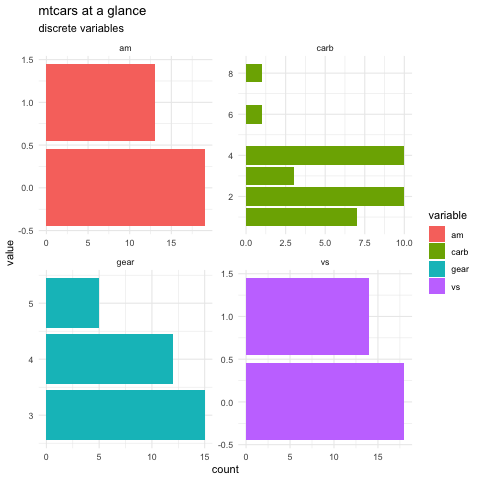

In [11]:
%%R 

# plot only discrete variables
to_plot <- mtcars_long %>% filter(variable %in% discrete_variables)

plot_discrete <- ggplot(to_plot) +
    aes(y=value, fill=variable) +
    geom_bar() +
    facet_wrap(~variable, scales='free') +
    theme_minimal() +
    labs(title = 'mtcars at a glance', subtitle='discrete variables')


plot_discrete

👉 What can we conclude about this dataset from the charts above?

In [12]:
# answer here
# More than half the cars in the dataset have automatic transmissions.
# More than half the cars in the dataset have V-shaped engine cylinders.
# Most cars in the dataset have 4 or fewer carburetor barrels.

👉 What can we not conclude about this dataset from the charts above?

In [13]:
# answer here
# Which car has the highest top speed?

👉 What further questions about this data do you have now? 

In [14]:
# answer here
# Which cars are these ??

# Comparing variables to one another

You're welcome to explore those univariate distributions more, but let's focus on something new. Comparing variables to one another. I'll start you off with a basic scatter plot.


`geom_smooth()` using formula = 'y ~ x'


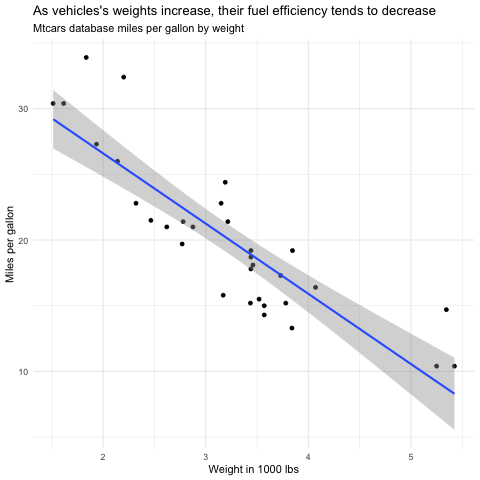

In [23]:
%%R

require(ggthemes)

ggplot(mtcars) +
    aes(y=mpg, x=wt) +
    theme_minimal() +
    geom_point() + 
    geom_smooth(method='lm') +
    labs(title = "As vehicles's weights increase, their fuel efficiency tends to decrease", subtitle='Mtcars database miles per gallon by weight') +
    # set x and y axis labels
    xlab('Weight in 1000 lbs') +
    ylab('Miles per gallon') 


# 👉 Try It

1. Imporve the chart above. Add a title and subtitle, and better axis labels. Be **very careful** about the language you use in the headline. Assume you have a very strict copyeditor, make the language easy to understand but make sure you're not saying more than what the data proves.

2. Answer the questions below:

    a. What can we conclude about fuel efficiency and weight
     - As a vehicle gets heavier, it generally gets less fuel efficient.

    b. What can't we conclude about fuel efficiency and weight
     - Whether or not there is a causal relationship between the two.

    c. What further questions do you have about this data?
     - What other factors affect mpg? The rate isn't uniform, so it has to be something in addition to weight.

## Part 1 (Gudied Inquiry)
# 👉 What makes cars more fuel efficient?


`geom_smooth()` using formula = 'y ~ x'


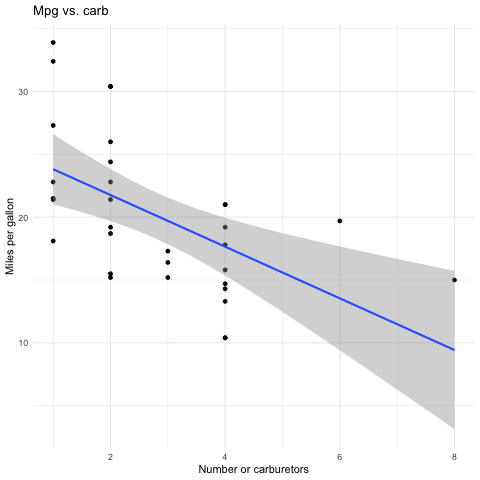

In [28]:
%%R

require(ggthemes)

ggplot(mtcars) +
    aes(y=mpg, x=carb) +
    theme_minimal() +
    geom_point() + 
    geom_smooth(method='lm') +
    labs(title = "Mpg vs. carb") +
    # set x and y axis labels
    xlab('Number or carburetors') +
    ylab('Miles per gallon') 

`geom_smooth()` using formula = 'y ~ x'


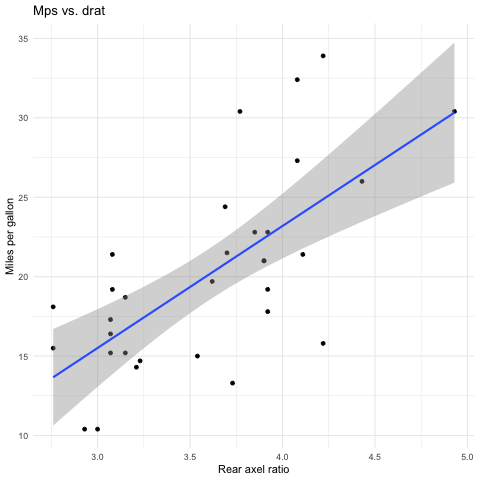

In [27]:
%%R

require(ggthemes)

ggplot(mtcars) +
    aes(y=mpg, x=drat) +
    theme_minimal() +
    geom_point() + 
    geom_smooth(method='lm') +
    labs(title = "Mps vs. drat") +
    # set x and y axis labels
    xlab('Rear axel ratio') +
    ylab('Miles per gallon') 

`geom_smooth()` using formula = 'y ~ x'


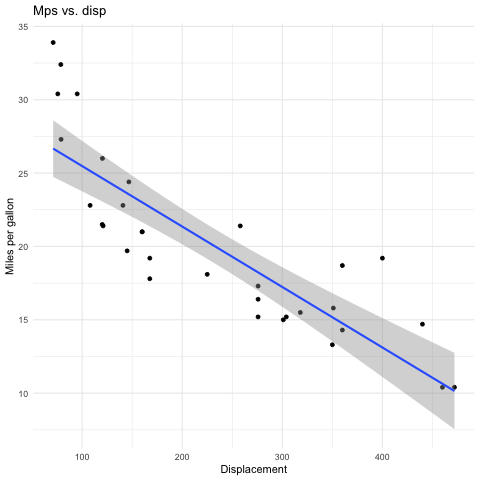

In [29]:
%%R

require(ggthemes)

ggplot(mtcars) +
    aes(y=mpg, x=disp) +
    theme_minimal() +
    geom_point() + 
    geom_smooth(method='lm') +
    labs(title = "Mps vs. disp") +
    # set x and y axis labels
    xlab('Displacement') +
    ylab('Miles per gallon') 

## It looks like a low displacement (engine volume), a high rear axel ratio, and fewer carburetors is somehow a recipe for high fuel efficiency.

## Part 2 (freeform inquiry)
Ask and try to answer your own questions about the dataset. Make at least two such charts below:


# 👉 Question 1: TKTK

What gives a car a faster 1/4 mile time?

### 👉 Charts or summary statistics to help answer your question

`geom_smooth()` using formula = 'y ~ x'


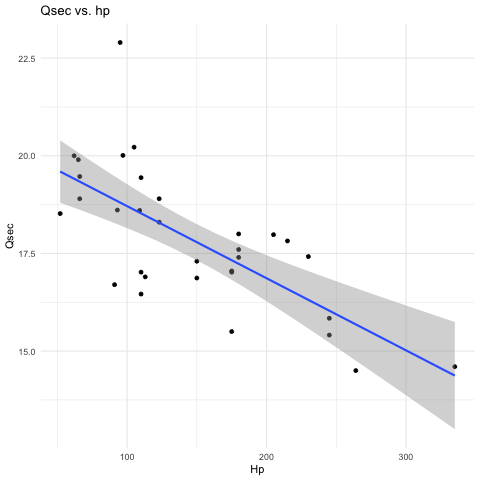

In [30]:
%%R

require(ggthemes)

ggplot(mtcars) +
    aes(y=qsec, x=hp) +
    theme_minimal() +
    geom_point() + 
    geom_smooth(method='lm') +
    labs(title = "Qsec vs. hp") +
    # set x and y axis labels
    xlab('Hp') +
    ylab('Qsec') 

`geom_smooth()` using formula = 'y ~ x'


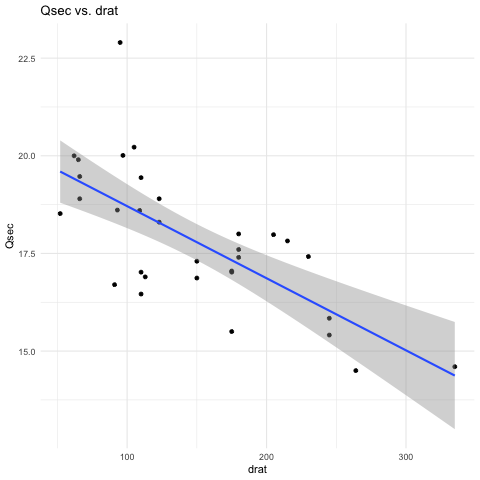

In [31]:
%%R

require(ggthemes)

ggplot(mtcars) +
    aes(y=qsec, x=hp) +
    theme_minimal() +
    geom_point() + 
    geom_smooth(method='lm') +
    labs(title = "Qsec vs. drat") +
    # set x and y axis labels
    xlab('drat') +
    ylab('Qsec') 

`geom_smooth()` using formula = 'y ~ x'


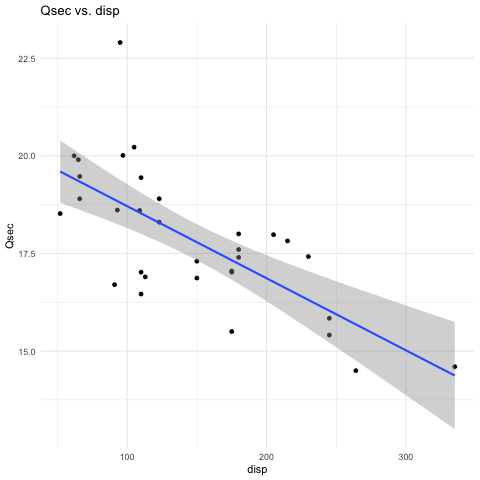

In [32]:
%%R

require(ggthemes)

ggplot(mtcars) +
    aes(y=qsec, x=hp) +
    theme_minimal() +
    geom_point() + 
    geom_smooth(method='lm') +
    labs(title = "Qsec vs. disp") +
    # set x and y axis labels
    xlab('disp') +
    ylab('Qsec') 

`geom_smooth()` using formula = 'y ~ x'


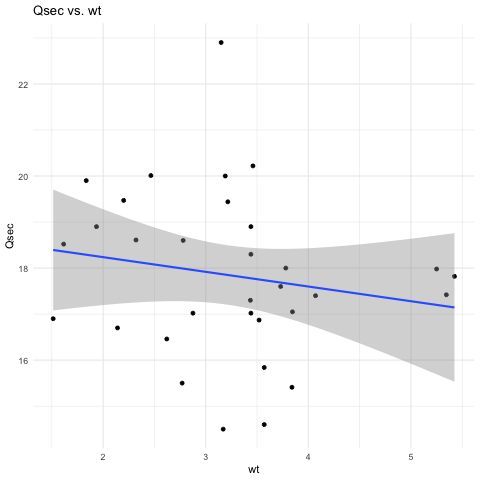

In [33]:
%%R

require(ggthemes)

ggplot(mtcars) +
    aes(y=qsec, x=wt) +
    theme_minimal() +
    geom_point() + 
    geom_smooth(method='lm') +
    labs(title = "Qsec vs. wt") +
    # set x and y axis labels
    xlab('wt') +
    ylab('Qsec') 

### 👉 Reflection

a. What can we conclude?
 - Engine volume, real axel ratio, and horse power are positively correlated with a faster 1/4 mile time.

b. What can't we conclude?
 - What specifically causes this.

c. What further questions does this analysis raise?
 - What's the cause? Are all the factors connected, and changing one will change the others? Or do they each have to be calibrated a certain way?
